In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score


In [3]:
bike_data = pd.read_csv('/Users/kanikag/anaconda3/lib/python3.11/site-packages/pandas/io/parsers/day.csv')
bike_data.shape

(730, 16)

In [4]:
# Looking at the first five rows
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# dropping the unwanted columns
bike_data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [7]:

# Convert 'weathersit' and 'season' to categorical
bike_data['weathersit'] = bike_data['weathersit'].astype('category')

bike_data['season'] = bike_data['season'].astype('category')

bike_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    int64   
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(2), float64(4), int64(6)
memory usage: 58.9 KB


<Axes: >

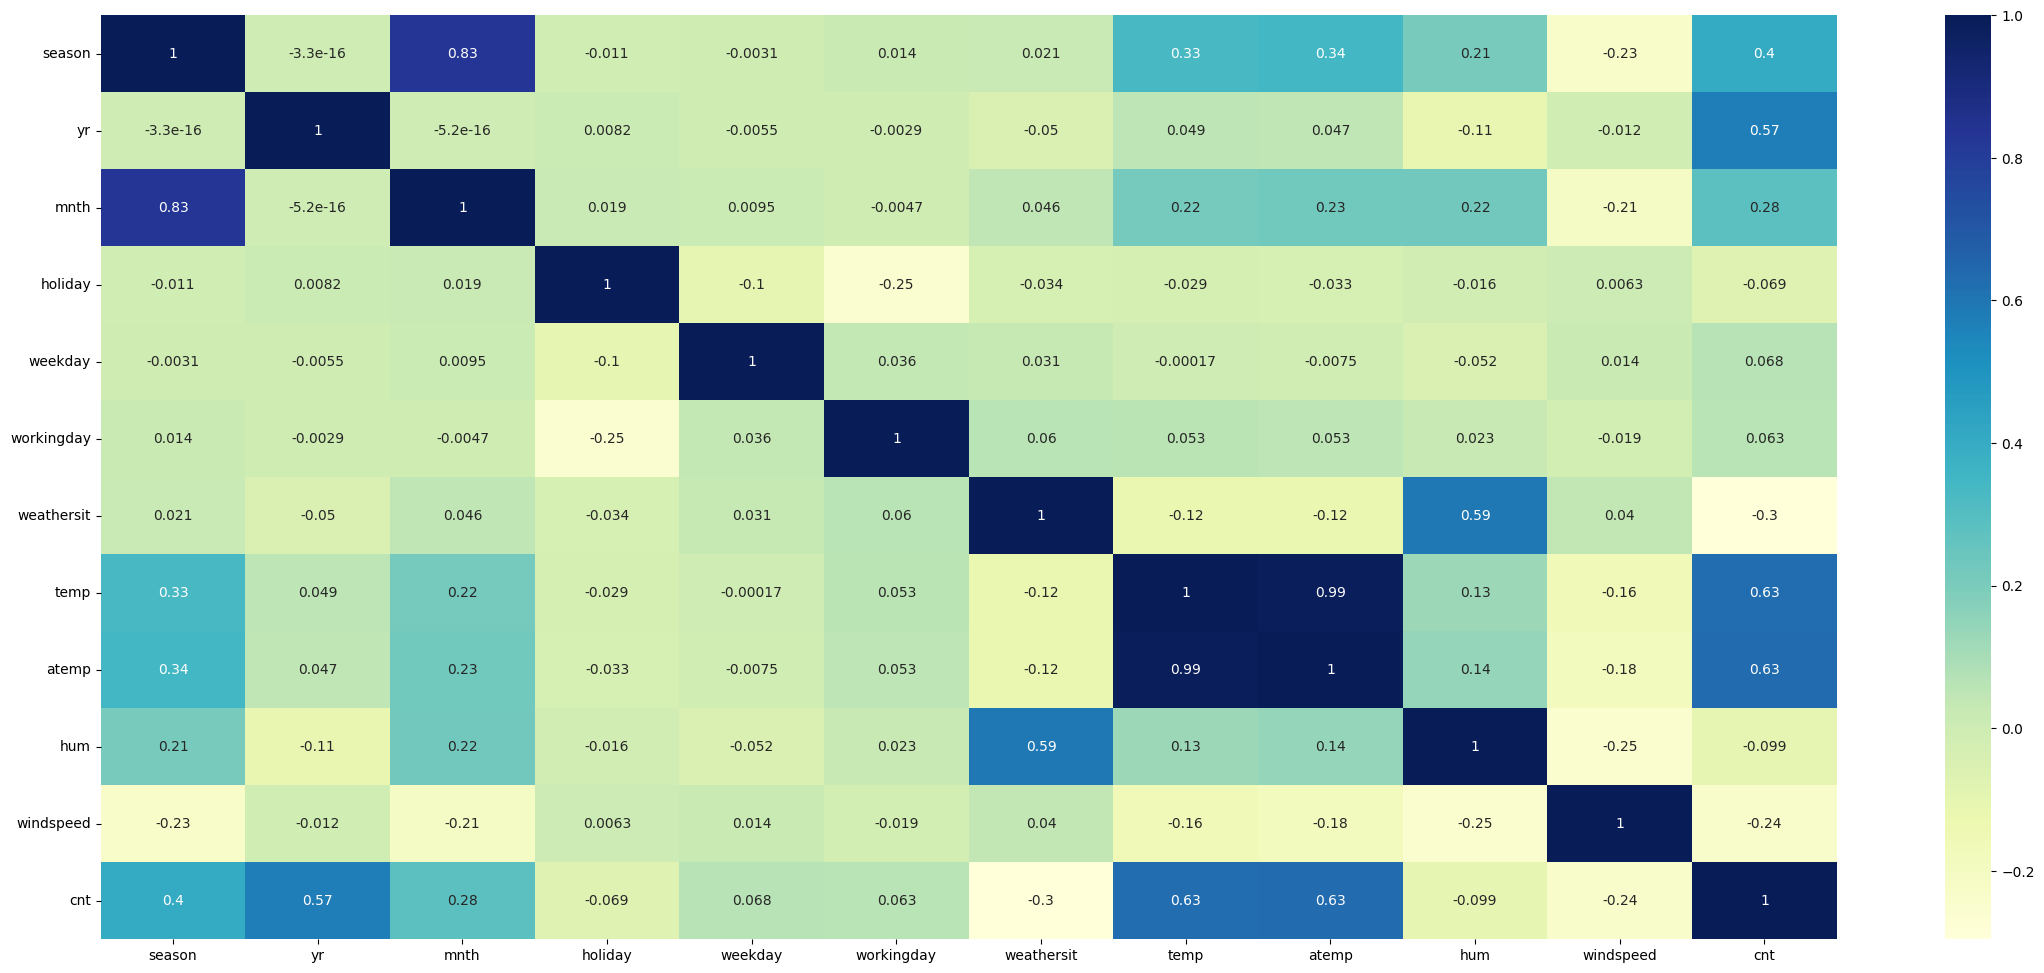

In [8]:
## After dropping the atemp column, checking the heatmap again for the data set
plt.figure(figsize=(28,12))
sns.heatmap(bike_data.corr(), annot = True, cmap='YlGnBu')

In [9]:
# There is high correlation between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity hence we can drop one of them
bike_data = bike_data.drop('atemp', axis=1)

## Visualising the Data

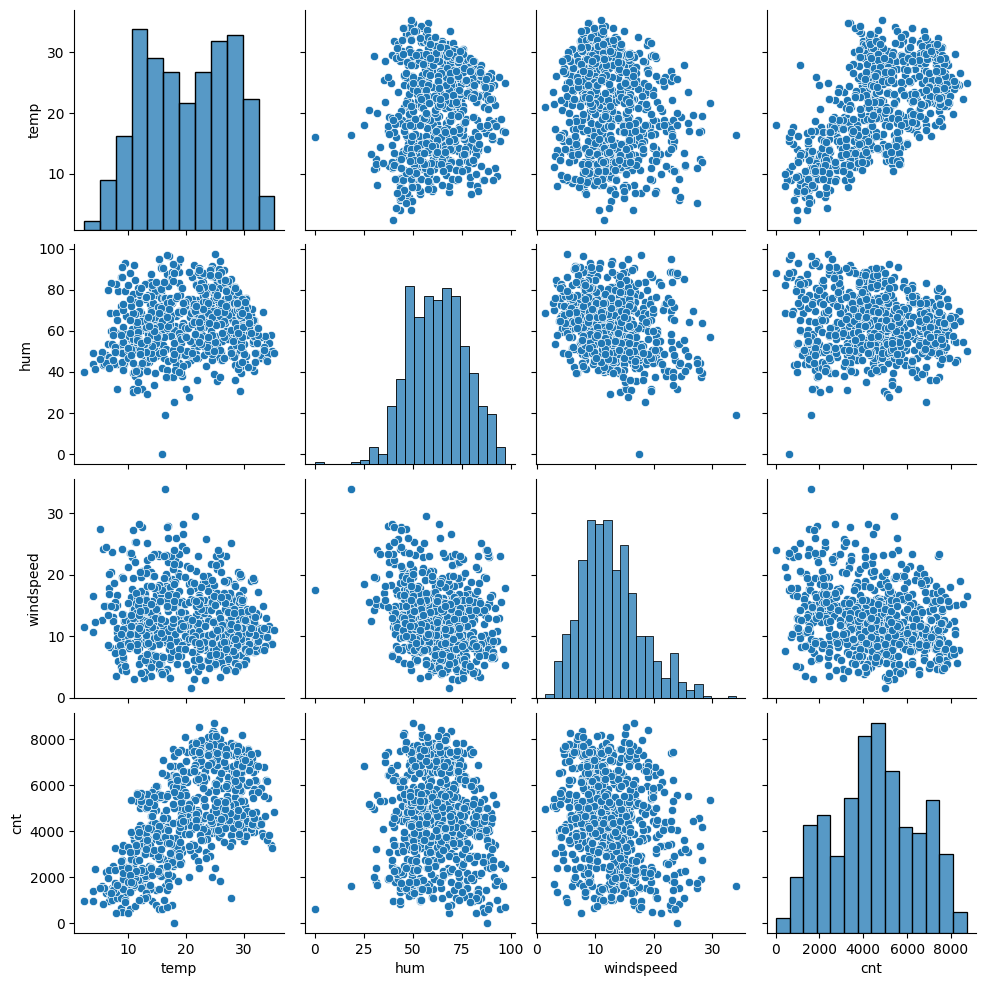

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
#Visualising Numeric Variables
#Let's make a pairplot of all the numeric variable
# Analysing/visualizing the numerical columns

sns.pairplot(data=bike_data,vars=['temp','hum','windspeed','cnt'])
plt.show()

In [11]:
# Mapping the season column

bike_data.season = bike_data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Mapping the month column

bike_data.mnth = bike_data.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Mapping the weekday column

bike_data.weekday = bike_data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# Mapping the weathersit column

bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Misty',3:'Rain_thunderstorm',4:'Heavy_rain_snow'})

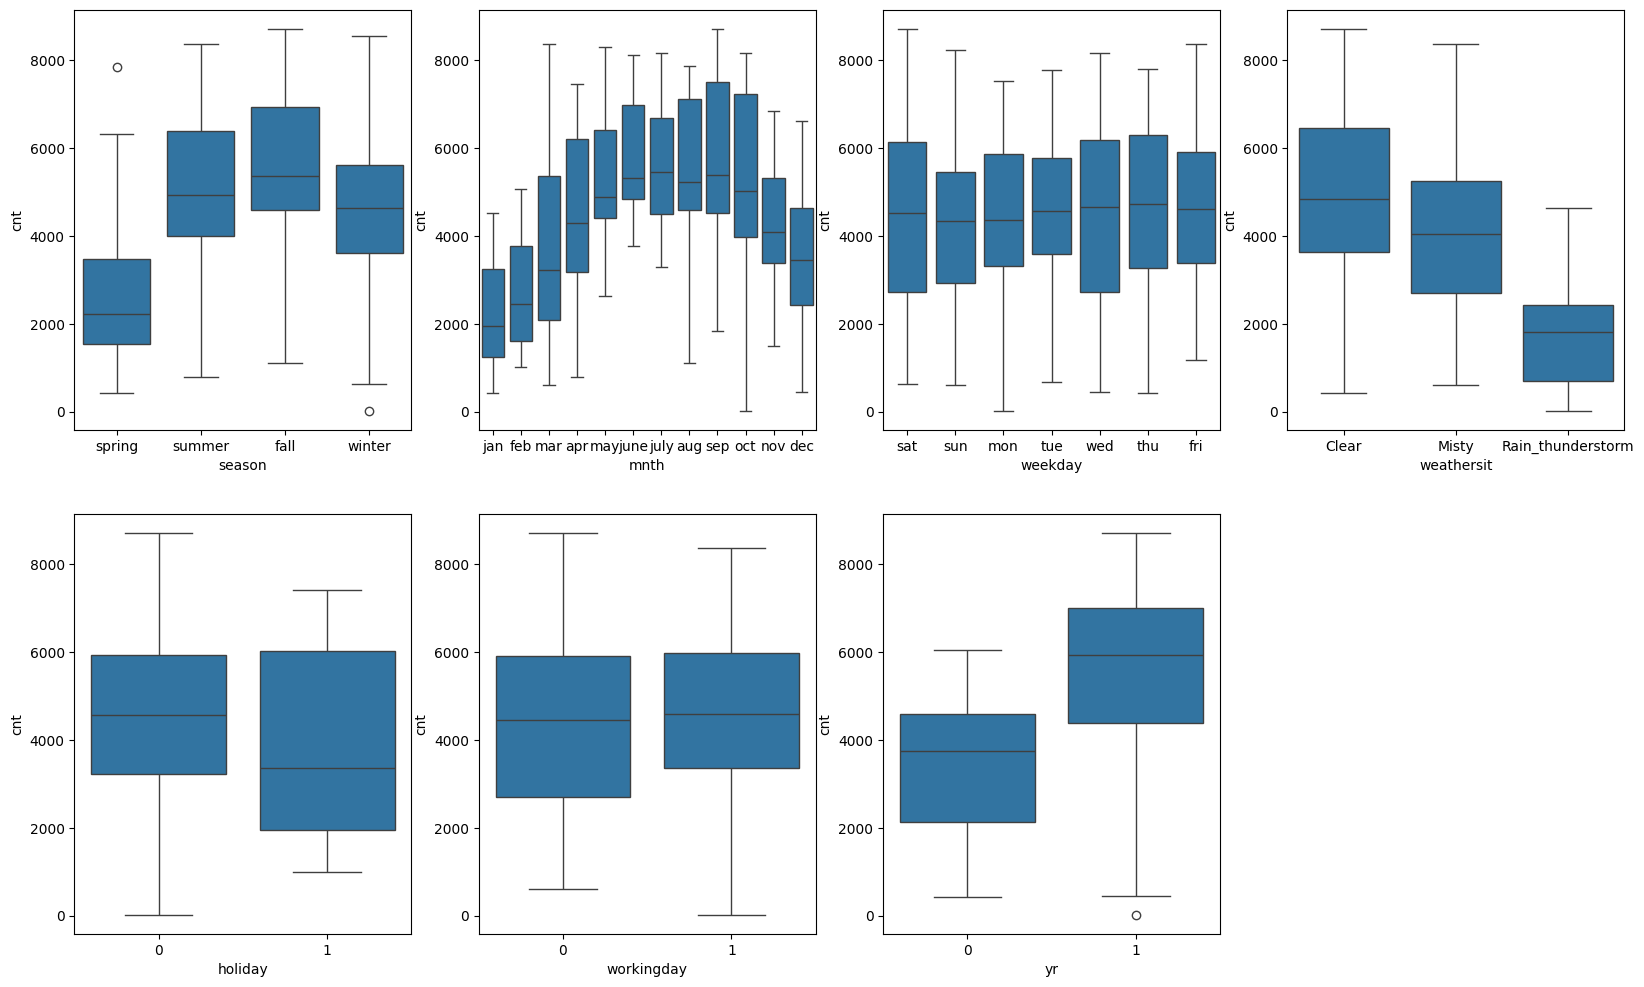

In [12]:
#Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.show()

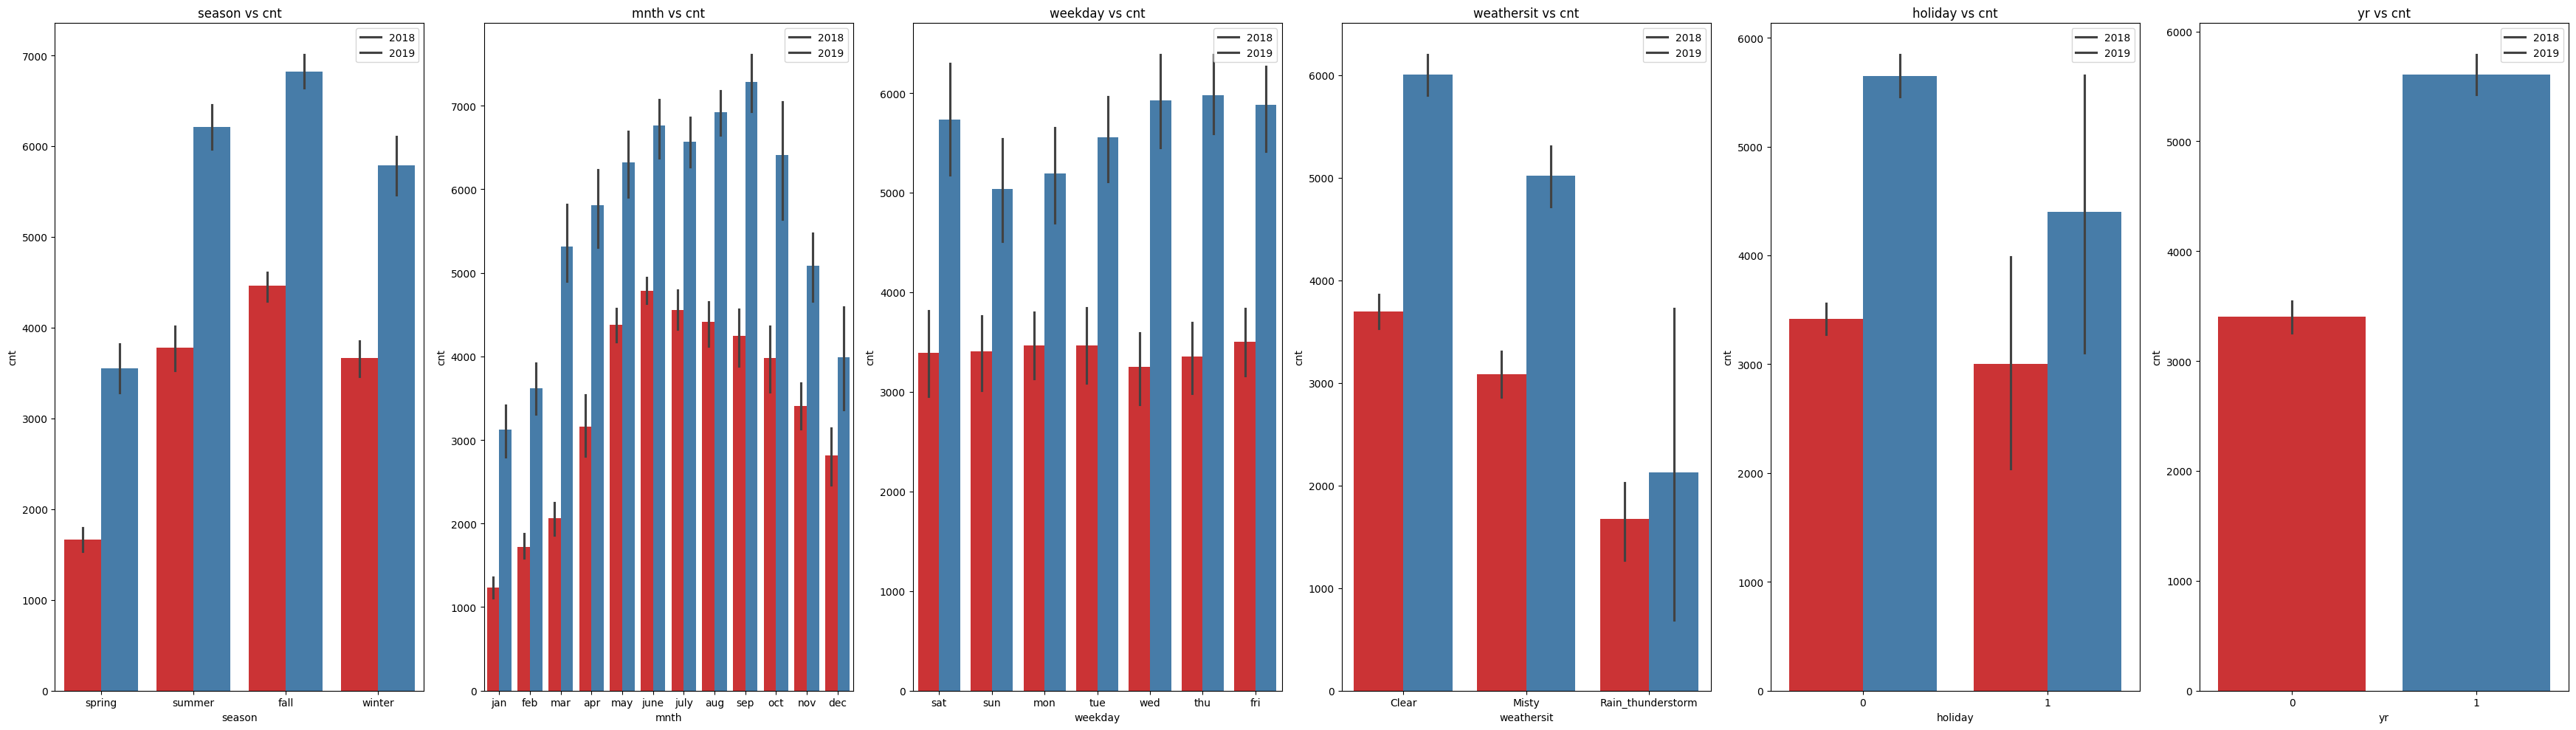

In [13]:
cat_columns = ['season' , 'mnth', 'weekday', 'weathersit', 'holiday', 'yr']
plt.figure(figsize=(35, 10))
for i, cat_column in enumerate(cat_columns, 1):
    plt.subplot(1, len(cat_columns), i)
    sns.barplot(x=cat_column, y='cnt', data=bike_data, hue='yr', palette='Set1')
    plt.title(f'{cat_column} vs cnt')
    plt.legend(labels=['2018', '2019'])

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

In [14]:
# analysis
# =========
# Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.
# Most of the bookings has been done during the month of june, july, aug, sep and oct. Also as seen earlier ; number of booking for each month have increased from 2018 to 2019.
# No significant impact because of weekday
# Clear weather attracted more booking which seems obvious. And number of bookings have increased for each weather in 2019
# Bookings are less on holidays as people wont travel to workplaces and hence less bookings
# In general all variables have shown that bookings in 2019 were much higher than 2018

## Data Preparation

In [15]:
# Create dummy variables for all categorical variables (month, weekday, weathersit and season) where no of categories are more than 2
months_data=pd.get_dummies(bike_data.mnth,drop_first=True)
weekdays_data=pd.get_dummies(bike_data.weekday,drop_first=True)
weathersit_data=pd.get_dummies(bike_data.weathersit,drop_first=True)
seasons_data=pd.get_dummies(bike_data.season,drop_first=True)
bike_data.head()
bike_data.shape

(730, 11)

In [16]:
# Merging the dummy variables to original data set

bike_data = pd.concat([bike_data,months_data,weekdays_data,weathersit_data,seasons_data],axis=1)
bike_data.shape

(730, 33)

In [17]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   season             730 non-null    category
 1   yr                 730 non-null    int64   
 2   mnth               730 non-null    object  
 3   holiday            730 non-null    int64   
 4   weekday            730 non-null    object  
 5   workingday         730 non-null    int64   
 6   weathersit         730 non-null    category
 7   temp               730 non-null    float64 
 8   hum                730 non-null    float64 
 9   windspeed          730 non-null    float64 
 10  cnt                730 non-null    int64   
 11  aug                730 non-null    bool    
 12  dec                730 non-null    bool    
 13  feb                730 non-null    bool    
 14  jan                730 non-null    bool    
 15  july               730 non-null    bool    
 16  june    

In [18]:
# dropping columns as we have already created dummy variable out of it.

bike_data.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike_data.shape

(730, 29)

In [19]:
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Misty,Rain_thunderstorm,summer,fall,winter
0,0,0,0,14.110847,80.5833,10.749882,985,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,0,0,0,14.902598,69.6087,16.652113,801,False,False,False,...,False,True,False,False,False,True,False,False,False,False
2,0,0,1,8.050924,43.7273,16.636703,1349,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,False,False,False,...,False,False,False,False,True,False,False,False,False,False


## Splitting the Data into Training and Testing Sets

In [20]:
from sklearn.model_selection import train_test_split

bike_data_train, bike_data_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
# check the shape of training datatset

bike_data_train.shape

(510, 29)

In [22]:
# Checking the values before using rescaling
bike_data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Misty,Rain_thunderstorm,summer,fall,winter
653,1,0,1,19.201653,55.8333,12.208807,7534,False,False,False,...,False,False,False,True,False,False,False,False,False,True
576,1,0,1,29.246653,70.4167,11.083475,7216,False,False,False,...,False,False,False,True,False,False,False,False,True,False
426,1,0,0,16.980847,62.1250,10.792293,4066,False,False,False,...,True,False,False,False,False,True,False,False,False,False
728,1,0,0,10.489153,48.3333,23.500518,1796,False,True,False,...,False,True,False,False,False,False,False,False,False,False
482,1,0,0,15.443347,48.9583,8.708325,4220,False,False,False,...,True,False,False,False,False,True,False,True,False,False


## Rescaling the Features
# We will use MinMax scaling.

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:


# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

bike_data_train[num_vars] = scaler.fit_transform(bike_data_train[num_vars])

bike_data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Misty,Rain_thunderstorm,summer,fall,winter
653,1,0,1,0.509887,0.575354,0.300794,0.864243,False,False,False,...,False,False,False,True,False,False,False,False,False,True
576,1,0,1,0.815169,0.725633,0.264686,0.827658,False,False,False,...,False,False,False,True,False,False,False,False,True,False
426,1,0,0,0.442393,0.640189,0.255342,0.465255,False,False,False,...,True,False,False,False,False,True,False,False,False,False
728,1,0,0,0.245101,0.498067,0.663106,0.204096,False,True,False,...,False,True,False,False,False,False,False,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,0.482973,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [25]:
# describing the dataset

bike_data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing into X and Y sets for the model building

In [26]:
y_train = bike_data_train.pop('cnt')
X_train = bike_data_train

# We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)
## RFE
# Recursive feature elimination

In [27]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

#rfe = RFE(lm, 15)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 13),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 14),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 9),
 ('wed', False, 11),
 ('Misty', True, 1),
 ('Rain_thunderstorm', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1)]

In [29]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'july',
       'sep', 'sat', 'sun', 'Misty', 'Rain_thunderstorm', 'summer', 'fall',
       'winter'],
      dtype='object')

In [30]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [31]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [32]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.dtypes

const                float64
yr                     int64
holiday                int64
workingday             int64
temp                 float64
hum                  float64
windspeed            float64
july                    bool
sep                     bool
sat                     bool
sun                     bool
Misty                   bool
Rain_thunderstorm       bool
summer                  bool
fall                    bool
winter                  bool
dtype: object

In [33]:
import pandas as pd

# Assuming df is your DataFrame
boolean_columns = ['july', 'sep', 'sat', 'sun', 'Misty', 'Rain_thunderstorm', 'summer', 'fall', 'winter']
numeric_columns = ['temp', 'hum', 'windspeed']

X_train_rfe[boolean_columns] = X_train_rfe[boolean_columns].astype(int)
X_train_rfe[numeric_columns] = X_train_rfe[numeric_columns].astype(float)

In [34]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [35]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.13e-191
Time:                        00:44:11   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1546      0.02

In [36]:
# function to calculate VIF of variables

def calculateVIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [37]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,holiday,inf
3,workingday,inf
9,sat,inf
10,sun,inf
14,fall,5.28
4,temp,3.62
13,summer,2.56
5,hum,1.91
15,winter,1.89
11,Misty,1.57


In [38]:
# as p value of holiday (.148) is more than 0.05 hence dropping the variable
X_train_new1 = X_train_rfe.drop(["holiday"], axis = 1)

In [39]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_new1)

In [40]:
lm1 = sm.OLS(y_train,X_train_lm1).fit()

In [41]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.13e-191
Time:                        00:44:11   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1245      0.03

In [42]:
# calculate new VIF after removing holiday

calculateVIF(X_train_new1)

,Features,VIF
0,const,82.73
2,workingday,9.07
8,sat,6.06
9,sun,5.74
13,fall,5.28
3,temp,3.62
12,summer,2.56
4,hum,1.91
14,winter,1.89
10,Misty,1.57


In [43]:
# as p value of sun (0.028) is more than 0.05 hence dropping the variable
X_train_new2 = X_train_new1.drop(["sun"], axis = 1)

In [44]:
# Adding a constant variable to new data
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_new2)

In [45]:
lm2 = sm.OLS(y_train,X_train_lm2).fit()

In [46]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          8.51e-192
Time:                        00:44:11   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1733      0.02

In [47]:
# calculate new VIF after dropping sun

calculateVIF(X_train_new2)

,Features,VIF
0,const,51.19
12,fall,5.28
3,temp,3.62
11,summer,2.56
4,hum,1.91
13,winter,1.89
2,workingday,1.65
8,sat,1.64
9,Misty,1.57
6,july,1.49


In [48]:
# dropping the variable fall as VIF is high and also its at edge of p value
X_train_new3 = X_train_new2.drop(["fall"], axis=1)

In [49]:
# Adding a constant variable to new data
import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()

#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.26e-191
Time:                        00:44:11   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1705      0.02

In [50]:
# calculate new VIF after dropping fall

calculateVIF(X_train_new3)

,Features,VIF
0,const,51.12
4,hum,1.89
2,workingday,1.65
8,sat,1.64
3,temp,1.60
9,Misty,1.56
6,july,1.43
11,summer,1.33
12,winter,1.29
10,Rain_thunderstorm,1.24


In [51]:
# dropping the variable july as VIF is high and p is 0.014
X_train_new4 = X_train_new3.drop(["july"], axis=1)

In [52]:
# Adding a constant variable to new data
import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()

#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.89e-191
Time:                        00:44:11   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1698      0.02

In [53]:
# calculate new VIF after dropping july

calculateVIF(X_train_new4)

,Features,VIF
0,const,51.12
4,hum,1.87
2,workingday,1.65
7,sat,1.64
8,Misty,1.56
3,temp,1.27
11,winter,1.25
9,Rain_thunderstorm,1.24
10,summer,1.19
5,windspeed,1.18


In [54]:
X_train_new5 = X_train_new4.drop(["const"], axis=1)

In [55]:
# calculate new VIF after dropping constant

calculateVIF(X_train_new5)

,Features,VIF
3,hum,15.98
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
7,Misty,2.10
0,yr,2.02
6,sat,1.79
10,winter,1.66
9,summer,1.58
5,sep,1.20


In [56]:
# dropping the variable hum as VIF is high
X_train_new6 = X_train_new5.drop(["hum"], axis=1)
X_train_lm6 = sm.add_constant(X_train_new6)
lm6 = sm.OLS(y_train,X_train_lm6).fit()

#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.47e-188
Time:                        00:44:11   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0753      0.01

In [57]:
lm6.params

const                0.075325
yr                   0.233056
workingday           0.056323
temp                 0.549936
windspeed           -0.155238
sep                  0.097236
sat                  0.067688
Misty               -0.081347
Rain_thunderstorm   -0.288021
summer               0.087429
winter               0.131826
dtype: float64

In [58]:
# calculate new VIF 

calculateVIF(X_train_new6)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
5,sat,1.69
8,summer,1.57
6,Misty,1.53
9,winter,1.40
4,sep,1.20
7,Rain_thunderstorm,1.08


In [59]:
# F statistics of 254.0 is good
# Also, Prob (F-statistic) is 1.47e-188 is very small which is considered very good because it strongly suggests that the overall regression model is statistically significant

## Residual Analysis of the train data

In [60]:
# So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [61]:
X_train_lm6

,const,yr,workingday,temp,windspeed,sep,sat,Misty,Rain_thunderstorm,summer,winter
653,1.0,1,1,0.509887,0.300794,0,0,0,0,0,1
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,1,0,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,1,0.824514,0.355596,0,0,1,0,1,0
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,1,0,0,1


In [62]:
y_train_pred = lm6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

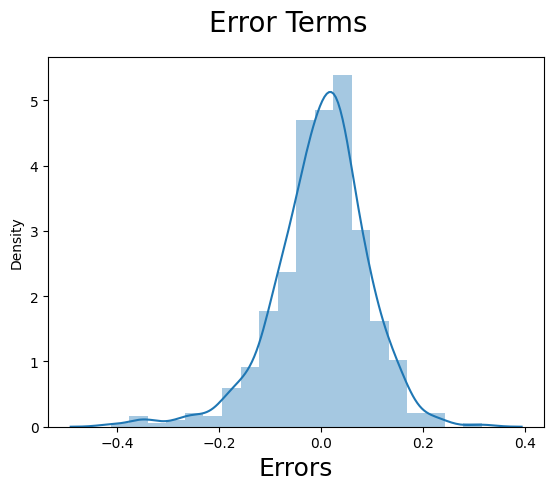

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [64]:
# analysis : Error terms are following normal distribution

## Multi Colinearity

In [65]:
calculateVIF(X_train_new6)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
5,sat,1.69
8,summer,1.57
6,Misty,1.53
9,winter,1.40
4,sep,1.20
7,Rain_thunderstorm,1.08


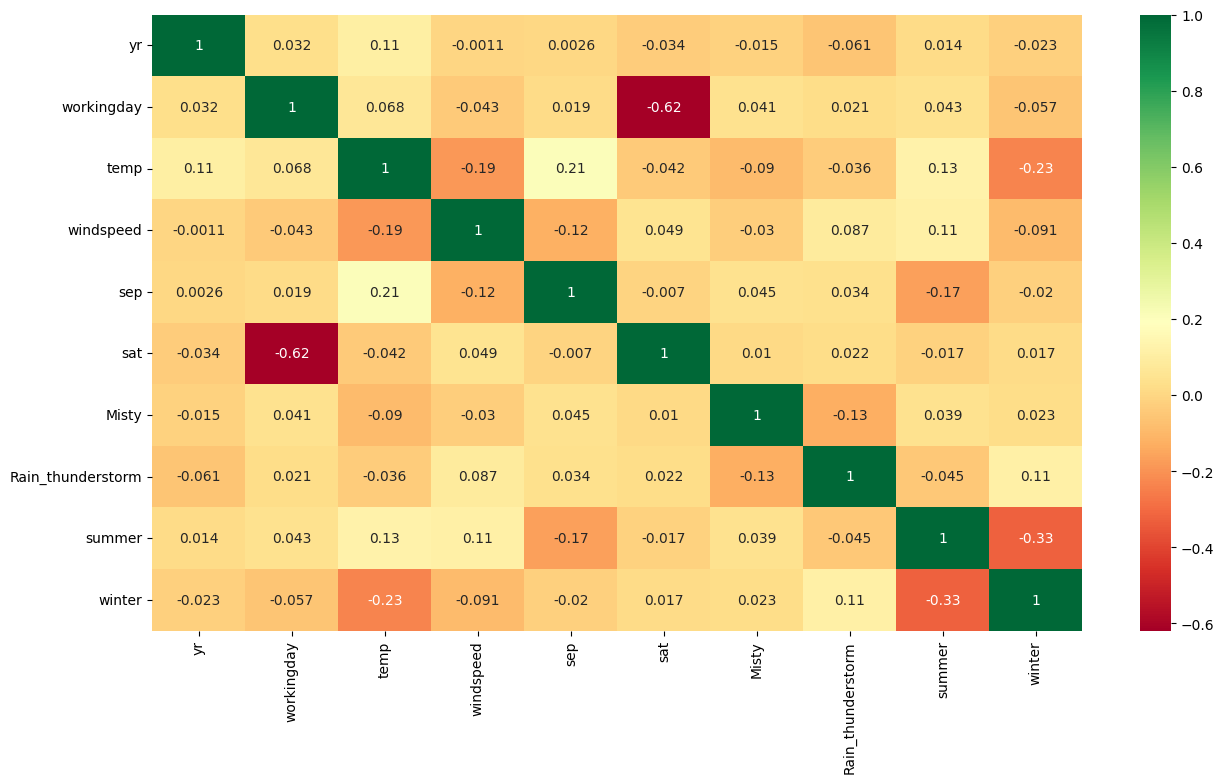

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new6.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [67]:
# analysis: VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

## Making Predictions 

In [68]:
# Applying scaling on the test dataset

num_vars = ['temp', 'hum', 'windspeed','cnt']

bike_data_test[num_vars] = scaler.fit_transform(bike_data_test[num_vars])

bike_data_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Misty,Rain_thunderstorm,summer,fall,winter
184,0,1,0,0.837241,0.534223,0.149393,0.704300,False,False,False,...,False,False,False,False,False,True,False,False,True,False
535,1,0,1,0.911423,0.470417,0.231142,0.725421,False,False,False,...,False,False,False,False,True,False,False,True,False,False
299,0,0,1,0.496221,0.777843,0.443398,0.278853,False,False,False,...,False,False,True,False,False,True,False,False,False,True
221,0,0,1,0.890387,0.236659,0.449707,0.545512,True,False,False,...,False,False,False,False,True,False,False,False,True,False
152,0,0,1,0.821739,0.070765,0.682387,0.569148,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [69]:
y_test = bike_data_test.pop('cnt')
X_test = bike_data_test

In [75]:

X_test_new = X_test[X_train_new6.columns]

# Adding a constant variable 
X_test_lm_6 = sm.add_constant(X_test_new)

In [77]:
# Making predictions
y_pred = lm6.predict(X_test_lm_6)

In [78]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.788

## Model Evaluation

Text(0, 0.5, 'y_pred')

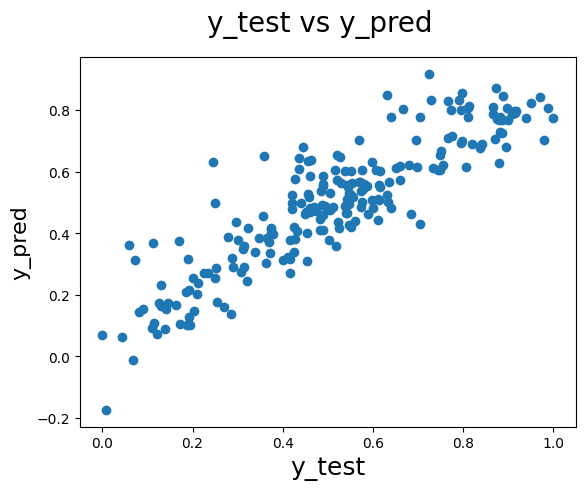

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [80]:
round(lm6.params,4)

const                0.0753
yr                   0.2331
workingday           0.0563
temp                 0.5499
windspeed           -0.1552
sep                  0.0972
sat                  0.0677
Misty               -0.0813
Rain_thunderstorm   -0.2880
summer               0.0874
winter               0.1318
dtype: float64

In [81]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7778


Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.836
- Test dataset R^2           : 0.788
- Train dataset Adjusted R^2 : 0.832    
- Test dataset Adjusted R^2  : 0.777
